### 1. Building and Analyzing Word Vectors with Word2Vec
• Task: Create word vectors using the Word2Vec model on a selected corpus.

• Visualization: Utilize PCA or t-SNE for visualizing these vectors in 2D.

• Analysis: Discuss the word relationships and clusters formed.

In [ ]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot



In [ ]:
dataset = api.load("text8")


In [ ]:
model = Word2Vec(sentences=dataset, vector_size=100, window=5, min_count=1, workers=4)
model.save("word2vec_text8.model")

In [ ]:
model = Word2Vec.load("word2vec_text8.model")

In [ ]:
import plotly.express as px
import pandas as pd


df = pd.DataFrame(result[:5000], columns=['x', 'y'])
df['word'] = words[:5000]

fig = px.scatter(df, x='x', y='y', text='word', hover_name='word')

fig.update_traces(textposition='top center')
fig.update_layout(title='Word Vectors Visualized with PCA',
                  xaxis_title='PCA 1',
                  yaxis_title='PCA 2',
                  title_x=0.5,
                  showlegend=False)


fig.show()

#### Analysis: word relationships and clusters formed.

# 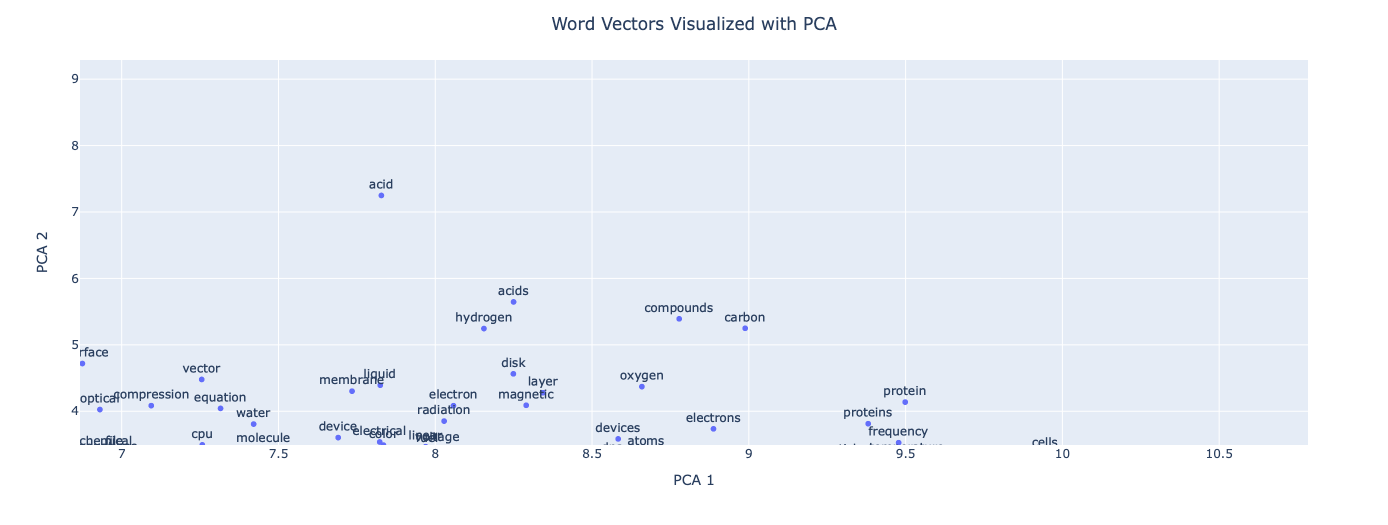

If we zoom in to a cluster near the word "acid", we can see how different terms related to Chemistry appear together; eg: carbon, compounds, protiens, oxygen ,hydrogen.

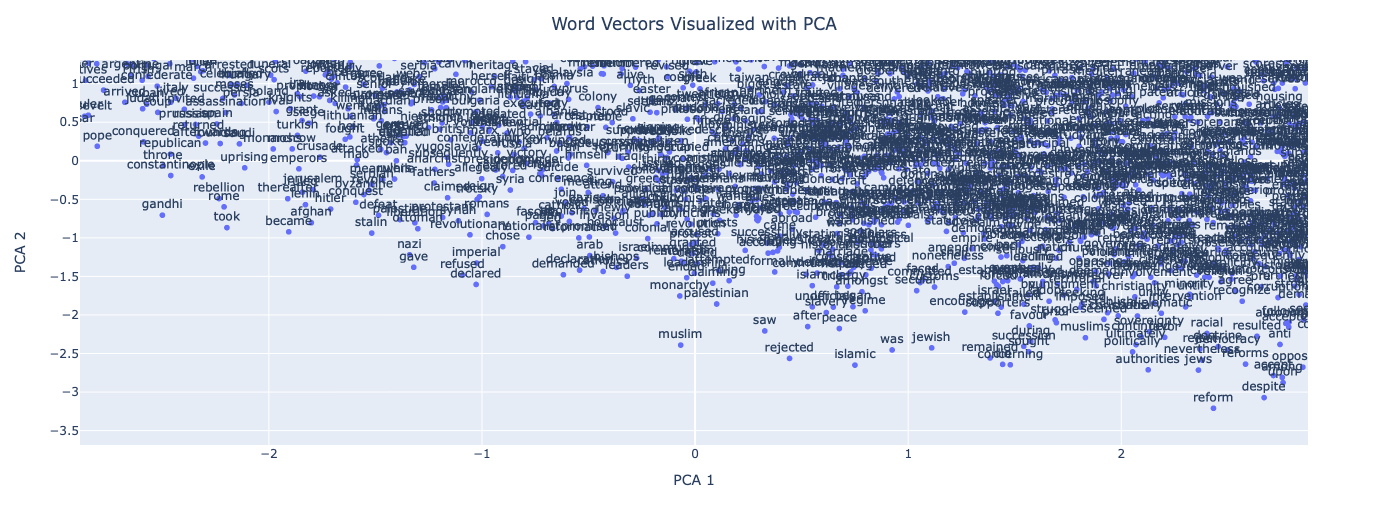



Similarly, upon zooming in at a cluster at the bottom, we see words related to religion: Eg: muslim, islamic, jewish, palestinian.


Chemistry and Religions are 2 extremely different domains, and as can be seen from the plot, these 2 appear far from each other  - one at top right and the other at bottom left.

###2. GloVe Vectors Advanced Analysis
• Task: Analyze word relationships using pre-trained GloVe vectors.

• Activity: Conduct an analogy task (e.g., king - man + woman = ?) with examples.

• Explanation: Explain the results of the analogy tasks.

In [ ]:
from gensim.models import KeyedVectors


In [ ]:
glove_model = api.load("glove-wiki-gigaword-100")
def analogy(word1, word2, word3, model=glove_model):
    try:
        result = model.most_similar(positive=[word2, word3], negative=[word1])
        return result[0][0]
    except KeyError as e:
        return f"Word not in vocabulary: {e}"


#### Analogy examples:

In [46]:
analogy('india', 'delhi', 'canada', model=glove_model)

'ottawa'

In [28]:
analogy('apple', 'red', 'lemon', model=glove_model)


'yellow'

In [48]:
analogy('fish', 'aquarium', 'dog', model=glove_model)


'kennel'

In [55]:
analogy('india', 'democracy', 'china', model=glove_model)


'democratization'

From the analogy results, it is evident that simple relationships between entities were correctly identified, however a more abstract relationship, like the kind of governance in different conutries wasn't established correctly.  It suggests a relationship where "India" is known for being a democracy, and "China" is related to the process or concept of "democratization." It's a nuanced result that may reflect the socio-political narratives or discussions present in the training data.

### 3. Semantic and Syntactic Word Relationships
• Comparison: Evaluate Word2Vec and GloVe for capturing semantic and syntactic
relationships.

• Illustration: Use specific word pairs or groups to demonstrate differences in representation
by each model.


In [62]:
symantic_word_pairs = [('king', 'queen'), ('man', 'woman'), ('paris', 'france'), ('car', 'vehicle')]
syntactic_word_pairs = [('sleep', 'sleeping'), ('run', 'ran'), ('man', 'men'), ('big', 'bigger')]

print("Word2Vec Symantic Similarities:")
for word1, word2 in symantic_word_pairs:
    print(f"{word1} & {word2}: {model.wv.similarity(word1, word2)}")

print("\nGloVe Symantic Similarities:")
for word1, word2 in symantic_word_pairs:
    print(f"{word1} & {word2}: {glove_model.similarity(word1, word2)}")

print("\nWord2Vec Syntactic Similarities:")
for word1, word2 in syntactic_word_pairs:
    print(f"{word1} & {word2}: {model.wv.similarity(word1, word2)}")

print("\nGloVe Syntactic Similarities:")
for word1, word2 in syntactic_word_pairs:
    print(f"{word1} & {word2}: {glove_model.similarity(word1, word2)}")



Word2Vec Symantic Similarities:
king & queen: 0.7188417315483093
man & woman: 0.7655028104782104
paris & france: 0.6526142954826355
car & vehicle: 0.6979166269302368

GloVe Symantic Similarities:
king & queen: 0.7507690787315369
man & woman: 0.8323494791984558
paris & france: 0.7481586337089539
car & vehicle: 0.8630838394165039

Word2Vec Syntactic Similarities:
sleep & sleeping: 0.6454467177391052
run & ran: 0.4482177793979645
man & men: 0.5317524671554565
big & bigger: 0.3415684103965759

GloVe Syntactic Similarities:
sleep & sleeping: 0.751613438129425
run & ran: 0.7490552663803101
man & men: 0.6719299554824829
big & bigger: 0.8024492263793945


Semantic Similarities:

Word2Vec shows relatively high similarity scores for commonly related pairs such as 'king & queen' and 'man & woman', reflecting a good understanding of common semantic relationships.
GloVe presents even higher similarity scores across the same word pairs, suggesting it may have a more nuanced understanding of these semantic relationships.



Syntactic Similarities:

Word2Vec shows moderate similarity scores for word pairs that share syntactic relationships. The scores are not as high as those for semantic pairs, indicating that while there's some recognition of grammatical relationships, it might not be as strong as the semantic understanding.
GloVe exhibits higher syntactic similarity scores, indicating a stronger recognition of grammatical relationships. For example, the score for 'big & bigger' is significantly higher than that of Word2Vec, suggesting GloVe's superior capability in capturing comparative forms.


GloVe seems to outperform Word2Vec in both semantic and syntactic tasks, which may result from its training on a larger corpus or its ability to encapsulate more global statistical information.




